In [27]:
%matplotlib inline

In [28]:
import numpy as np

from msslib.utils import *
from msslib.labels import mss_labels
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import metrics

In [29]:
base_path = "/home/finlay/Dropbox/test_runs/LDA_SSVM_grid_run/"
results_paths = sorted(list(filter(lambda x: 'results' in x, listpaths(base_path))))
results_paths

['/home/finlay/Dropbox/test_runs/LDA_SSVM_grid_run/A_labels_and_results.npy',
 '/home/finlay/Dropbox/test_runs/LDA_SSVM_grid_run/B_labels_and_results.npy']

In [30]:
scores = []
for path in results_paths:
    results = np.load(path)
    p,r,f,_ = metrics.precision_recall_fscore_support(results[0], results[1], average='weighted')
    
    scores.append({'label': only_basename(path),
                    'precision': p,
                    'recall': r,
                    'fscore': f,
                    'c_matrix': metrics.confusion_matrix(results[0], results[1])
                  })


In [31]:
scores

[{'c_matrix': array([[  886493,  4107802,        0,     6220,        0],
         [  251622, 82491426,   944886,  2307332,  1225565],
         [       0,  2320557, 21864704,  1159210,  1631306],
         [       0,   570379,   141843,  1383777,   152011],
         [       0,  1111282,    40864,   911914, 43890807]]),
  'fscore': 0.89722520402860839,
  'label': 'A_labels_and_results',
  'precision': 0.91103394848824237,
  'recall': 0.89914699522102748},
 {'c_matrix': array([[  947547,  2716387,     2220,      380,     5354],
         [ 1593738, 46032244,  8430600,  1220247,  5645926],
         [   50794, 10334926,  9482032,   687838,  1533805],
         [    4147,   893598,   255080,   128170,   542190],
         [    3024,  1817801,   293039,   673837, 31985076]]),
  'fscore': 0.70127015349960709,
  'label': 'B_labels_and_results',
  'precision': 0.69961888972010167,
  'recall': 0.70701683429118778}]

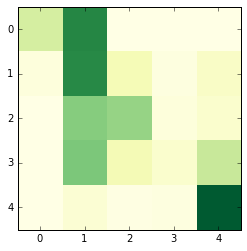

In [32]:
plot_confusion_matrix(plt, scores[1])

In [24]:
struct_run = scores[0]

In [8]:
from msslib.evaluate import *

In [9]:
def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    #ax.title(score['label'][0])
    #tick_marks = np.arange(len(mss_labels))
    #ax.xticks(tick_marks, mss_labels)
    #ax.yticks(tick_marks, mss_labels)
    #ax.tight_layout()
    #ax.ylabel('True label')
    #ax.xlabel('Predicted label')

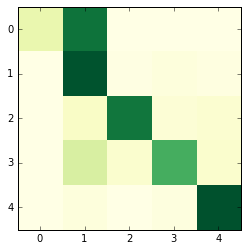

In [25]:
plot_confusion_matrix(plt, struct_run)


In [26]:
struct_run

{'c_matrix': array([[  886493,  4107802,        0,     6220,        0],
        [  251622, 82491426,   944886,  2307332,  1225565],
        [       0,  2320557, 21864704,  1159210,  1631306],
        [       0,   570379,   141843,  1383777,   152011],
        [       0,  1111282,    40864,   911914, 43890807]]),
 'fscore': 0.89722520402860839,
 'label': 'A_labels_and_results',
 'precision': 0.91103394848824237,
 'recall': 0.89914699522102748}

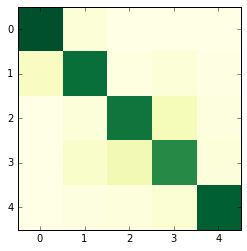

In [20]:
plot_confusion_matrix(plt, centroid_run)


In [21]:
centroid_run

{'c_matrix': array([[ 3638407,   141666,      328,     5951,        0],
        [ 6203008, 55065310,   962334,  2736712,   323815],
        [     282,   664167, 16596476,  2693908,   454596],
        [    4873,   141831,   263754,  1293663,    61566],
        [     102,   643548,   923334,  1750192, 30710177]]),
 'fscore': 0.8828453016934612,
 'label': 'A_labels_and_results',
 'precision': 0.92845038742339259,
 'recall': 0.85651367337164752}

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(9.2,10),sharex='col', sharey='row')

tick_marks = np.arange(len(mss_labels))
axes[0][0].set_yticklabels(['']+mss_labels)
axes[1][0].set_yticklabels(['']+mss_labels)
axes[2][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][1].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][2].set_xticklabels(['']+mss_labels,ha='right', rotation=45)

for a, s in zip(axes.flat, scores):
    a.set_title(s['label'][0])
    c_m = normalise_confusion_matrix(s['c_matrix'])
    im = a.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=70)
plt.colorbar(im, cax=cax, **kw)

In [ ]:
fig.savefig('c_matrix.png')

In [ ]:
fig = plt.figure()
fs = [s['fscore'] for s in scores]
labels = [s['label'][0] for s in scores]
del fs[6]
del labels[6]
x = range(len(fs))
plt.scatter(np.arange(len(fs)), fs, c='green', marker='D')
plt.xticks(x, labels)
plt.ylabel('F-score')
plt.xlabel('Test runs')

fig.savefig('scatter.png')

In [ ]:
scores